In [2]:
from astropy.io import fits,ascii
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import os
import sys
import warnings
warnings.filterwarnings('ignore')
from astropy.table import Table
from astropy.coordinates import SkyCoord
from scipy.stats import ks_2samp
from astropy import units as u

In [3]:
homedir = os.getenv("HOME")
sys.path.append(homedir+'/github/APPSS/')
from a100sdss import ks, anderson
sys.path.append(homedir+'/github/LCS/python/Python3/')
from LCScommon import *

Running on coma


In [4]:
plotdir = homedir+'/research/LCS/plots/'


# Compare B/T distribution of core and infall galaxies #

* need to see if BT distribution is similar
* if not, we will need to cut on BT for the simulation
* otherwise we will conflate multiple factors


CONCLUSION
* B/T of core/infall are significantly different. pvalue = 1.6e-10 
* after cutting B/T < 0.3, the difference is much smaller.  pvalue = 0.015

Ks_2sampResult(statistic=0.18716414862340822, pvalue=1.626687673450533e-10)
Ks_2sampResult(statistic=0.12097346123698256, pvalue=0.015355063312994743)


<Figure size 489.6x360 with 0 Axes>

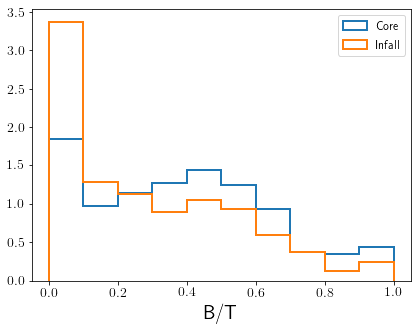

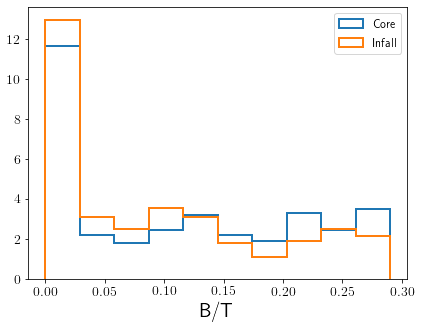

In [57]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py 
outfile1 = homedir+'/research/LCS/plots/lcscore-external-BTcut.pdf'
outfile2 = homedir+'/research/LCS/plots/lcscore-external-BTcut.png'
b.lcs_compare_BT()#outfile1=outfile1,outfile2=outfile2,nbins=12)
plt.savefig(outfile1)
plt.savefig(outfile2)

# Comparison of LCS with GSWLC #

- The GSWLC provides a better comparison sample for us.
- I matched to GSWLC-X2 - used 5 arcsecond radius.  found 1496 matches.
  - I didn't note how I did the match.  I don't see any python programs, so I probably used topcat.
  - redoing on 5/29/20
  - matching LCS_all_size_KE_SFR.fits with GSWLC-X2-LCS-Zoverlap.dat
  - matching NSA RA,DEC with GSWLC RA,DEC
    - 5 arcsec offset
    - best match, symmetric
    - 1 and 2
    - found 1477 pairs (~20 fewer than last time :( )
   - 10 arcsec search radius
     - 1487 pairs
   - 15 arcsec search radius
     - 1490 pairs
- we can use the GSWLC SFRs and Stellar masses for both the LCS and comparison galaxies.  This removes significant uncertainty associated with mixing methods for calculating SFR and Mstar.

- redshift limit $0.01 < z < 0.03$
- mag limit r petrosian $r = 18.0$
- main sequence: $log10(sSFR) > -11$
- explanation of GSWLC-2 catalog http://pages.iu.edu/~salims/gswlc/table2.pdf

**Stellar Mass Limit**

- convert r to Mr at maximum distance of LCS ($z=.0433$)
- then plot Mstar vs Mr, and estimate Mstar limit from Mr limit

**SFR Limit**
- Salim+2018 use $log10(sSFR) > -11$ to select star-forming galaxies
- $log10(sSFR) < -11.5$ should be considered upper limits GSWLC-A (Salim+2018, pg 11, col2)
  - we use this as our sSFR limit
- for SF galaxies, SFR errors are typically below 0.1dex

**Environment Catalogs**
- yang+07
- tempel+2012 - http://www.aai.ee/~elmo/dr8groups/readme.txt
- decarvalha+2017

# SFR - Mstar: no B/T cut #

repeating above three plots, but for SFR vs Mstar

### SFR-M*: LCS core vs GSWLC field, no BT cut ###

* SFRs are VERY different
* stellar masses are different

**need to make a mass-matched sample?**
as a counter point, the difference in stellar mass distributions are due to the 
GSWLC sample having lower mass galaxies. This would increase the fraction of low-SFR galaxies in the GSWLC sample, yet the LCS core galaxies have even lower SFRs. 

number in lcs sample =  218
number in gsw sample =  15454
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.10
p-vale = 2.492e-02 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.36
p-vale = 2.981e-24 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

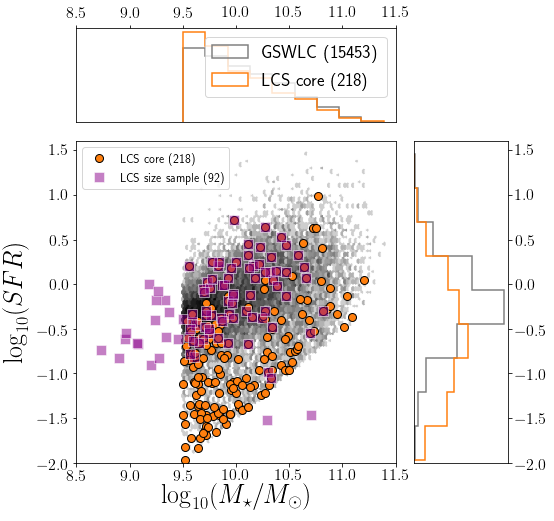

In [77]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --minmass 9.5
flag = b.lcs.cat['membflag'] 
outfile1 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar.pdf'
outfile2 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar.png'
b.plot_sfr_mstar(lcsflag=flag,outfile1=outfile1,outfile2=outfile2,massmatch=False)

### mass-matched sample ###

number in lcs sample =  218
number in gsw sample =  15454
galaxies in slice < # requested 5 20 11.206 0.0266
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.03
p-vale = 9.965e-01 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.34
p-vale = 2.405e-21 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

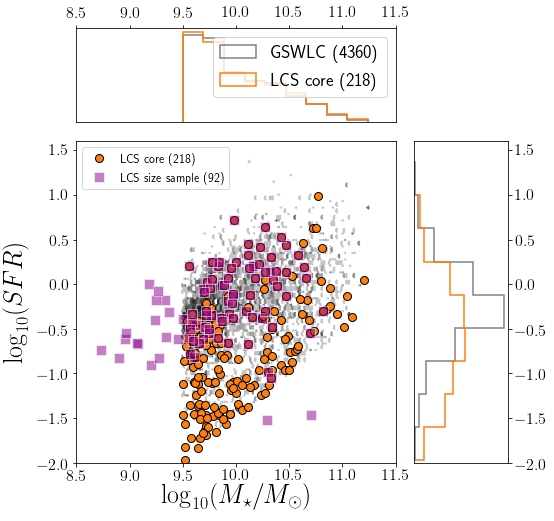

In [109]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --minmass 9.5
flag = b.lcs.cat['membflag'] 
outfile1 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar.pdf'
outfile2 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar.png'
b.plot_sfr_mstar(lcsflag=flag,outfile1=outfile1,outfile2=outfile2)

### adding a redshift cut too ###

number in lcs sample =  90
number in gsw sample =  7835
galaxies in slice < # requested 5 20 11.206 0.0266
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.07
p-vale = 7.726e-01 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.27
p-vale = 3.219e-06 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

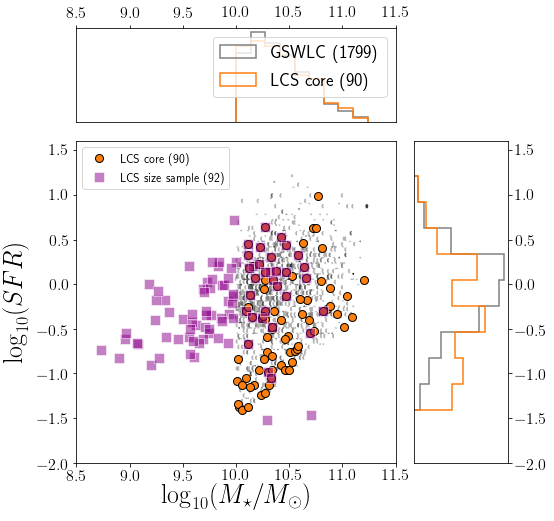

In [101]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --minmass 10
flag = b.lcs.cat['membflag'] 
outfile1 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar.pdf'
outfile2 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar.png'
b.plot_sfr_mstar(lcsflag=flag,outfile1=outfile1,outfile2=outfile2)

In [46]:
sum(b.lcs.cat['sampleflag'] & b.lcs.cat['membflag'])

92

### SFR-M*: LCS infall vs GSWLC, no BT cut ###

* stellar masses are very diff (more low-mass galaxies in gswlc)
* SFRs are not different

**again, need mass-matched sample**

number in lcs sample =  87
number in gsw sample =  7835
galaxies in slice < # requested 16 20 10.782 0.0208
galaxies in slice < # requested 2 20 11.21 0.0295
galaxies in slice < # requested 5 20 11.293 0.0332
galaxies in slice < # requested 3 20 11.041 0.021
galaxies in slice < # requested 0 20 10.931 0.0169
	ruh roh - doubling mass and redshift slices
galaxies in slice < # requested 5 20 10.939 0.0219
galaxies in slice < # requested 7 20 10.509 0.0153
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.06
p-vale = 8.683e-01 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.18
p-vale = 6.079e-03 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

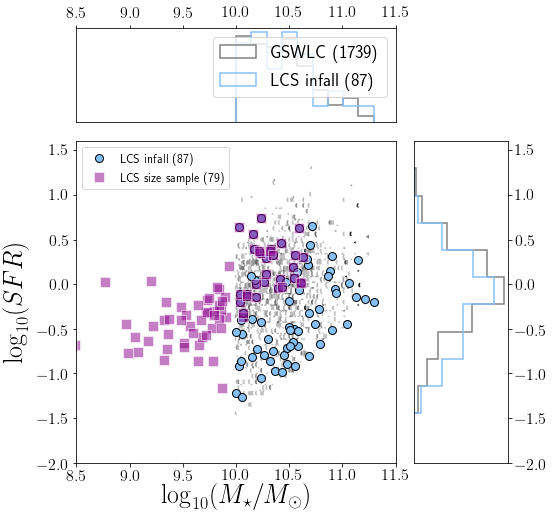

In [102]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --minmass 10
flag = ~b.lcs.cat['membflag'] & (b.lcs.cat['DELTA_V'] < 3.)
outfile1 = homedir+'/research/LCS/plots/lcsinfall-gsw-sfrmstar.pdf'
outfile2 = homedir+'/research/LCS/plots/lcsinfall-gsw-sfrmstar.png'
b.plot_sfr_mstar(lcsflag=flag,label='LCS infall',outfile1=outfile1,outfile2=outfile2,coreflag=False)

### SFR-M*: LCS core vs infall, no BT cut ###

* stellar masses are not diff 
* SFRs are not different

**again, need mass-matched sample**

number in core sample =  392
number in external sample =  299
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.10
p-vale = 5.303e-01 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.14
p-vale = 1.359e-01 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

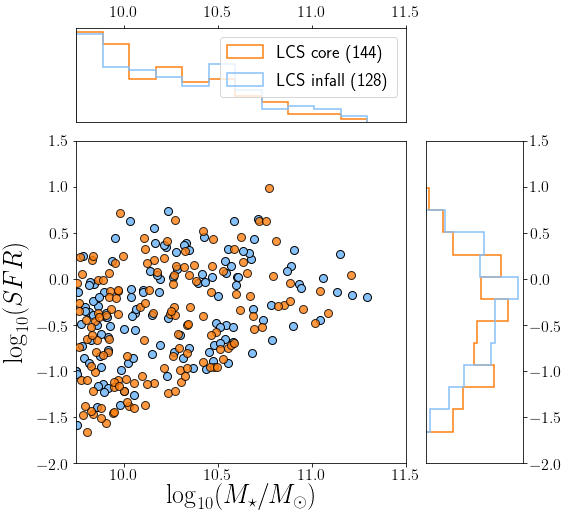

In [59]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --minmass 9.
outfile1 = homedir+'/research/LCS/plots/lcscore-external-sfrmstar.pdf'
outfile2 = homedir+'/research/LCS/plots/lcscore-external-sfrmstar.png'
b.plot_sfr_mstar_lcs(outfile1=outfile1,outfile2=outfile2,nbins=12)

# SFR- Mstar with B/T < 0.3 #

### SFR-M*: LCS infall vs GSWLC, with BT cut ###


* SFRs are not different
* stellar masses are very diff (more low-mass galaxies in gswlc)

**again, need mass-matched sample**

* make a cumulative histogram of core masses
* draw a random number [0,1]
* determine mass that corresponds to that point on cumulative histogram
* then select GSWLC galaxy with comparable mass
* how to avoid selecting the same galaxy multiple times?
  * pick closest galaxy that hasn't already been picked
* verify 

number in lcs sample =  99
number in gsw sample =  10598
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.05
p-vale = 9.701e-01 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.23
p-vale = 7.521e-05 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

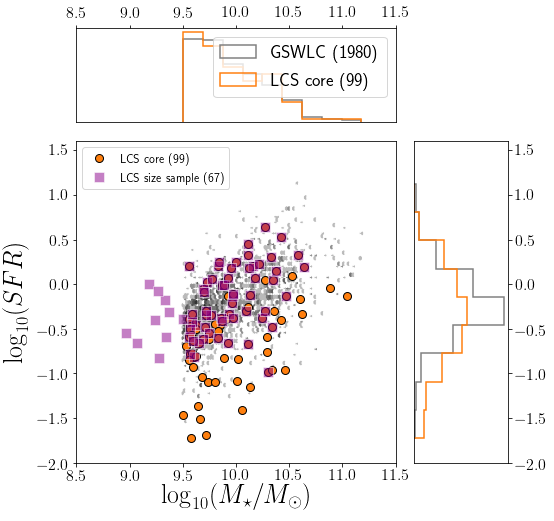

In [103]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT --minmass 9.5
flag = b.lcs.cat['membflag'] 
outfile1 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar-BTcut.pdf'
outfile2 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar-BTcut.png'
b.plot_sfr_mstar(lcsflag=flag,outfile1=outfile1,outfile2=outfile2)

### SFR-M* :  LCS infall vs GSWLC - with BT cut ###

* SFRs are marginally different
* stellar masses are indistinguisable


number in lcs sample =  39
number in gsw sample =  4791
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.07
p-vale = 9.780e-01 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.12
p-vale = 5.886e-01 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

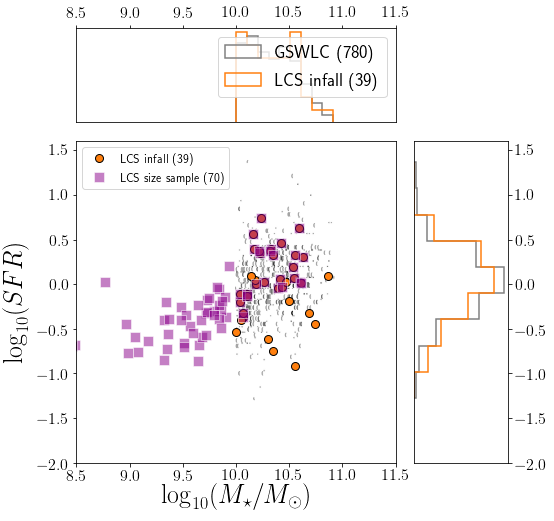

In [104]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT
flag = ~b.lcs.cat['membflag'] & (b.lcs.cat['DELTA_V'] < 3.)
outfile1 = homedir+'/research/LCS/plots/lcsinfall-gsw-sfrmstar-BTcut.pdf'
outfile2 = homedir+'/research/LCS/plots/lcsinfall-gsw-sfrmstar-BTcut.png'
b.plot_sfr_mstar(lcsflag=flag,label='LCS infall',outfile1=outfile1,outfile2=outfile2)

### SFR - M*: LCS core vs infall, with B/T cut ###

* masses and SFRs are the same

number in core sample =  38
number in external sample =  39
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.15
p-vale = 6.981e-01 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.27
p-vale = 9.633e-02 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

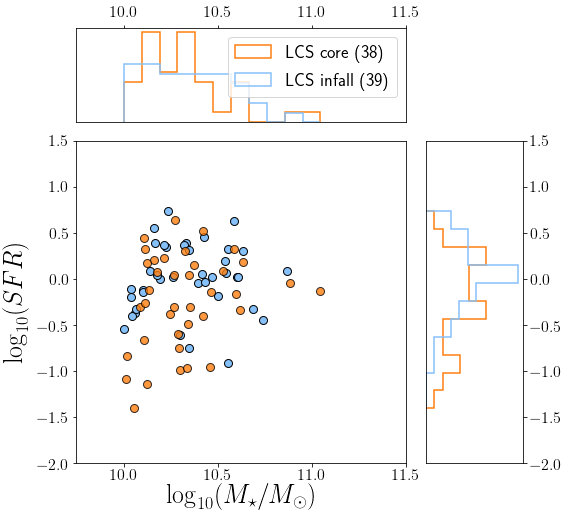

In [34]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT
outfile1 = homedir+'/research/LCS/plots/lcscore-external-sfrmstar-BTcut.pdf'
outfile2 = homedir+'/research/LCS/plots/lcscore-external-sfrmstar-BTcut.png'
b.plot_sfr_mstar_lcs(outfile1=outfile1,outfile2=outfile2,nbins=12)

# sSFR-Mstar: Compare LCS and GSWLC - no B/T cut #
# (updates from 7/1/2020) #

- limited by stellar mass, ssfr, and B/T < 0.3


### sSFR-M*: LCS core vs GSWLC Field, no BT cut ###

* sSFRs are different
* stellar masses are the same

number in core sample =  92
number in external sample =  7835
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.11
p-vale = 2.089e-01 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.30
p-vale = 6.201e-08 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

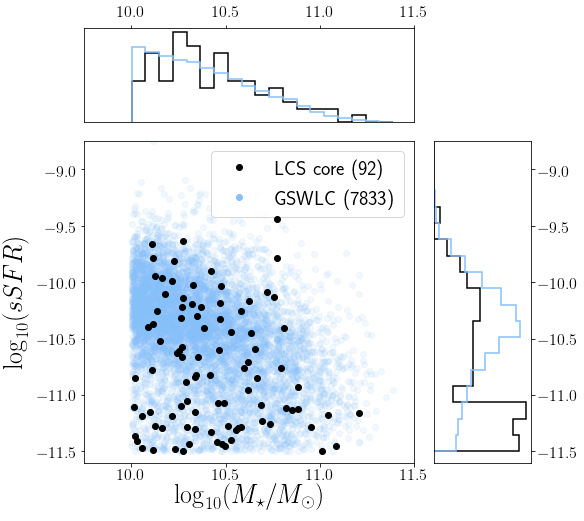

In [13]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py 
flag = b.lcs.cat['membflag'] 
outfile1 = homedir+'/research/LCS/plots/lcscore-gsw-ssfrmstar.pdf'
outfile2 = homedir+'/research/LCS/plots/lcscore-gsw-ssfrmstar.png'
b.plot_ssfr_mstar(lcsflag=flag,outfile1=outfile1,outfile2=outfile2)

### sSFR-M*: LCS infall vs GSWLC Field, no BT cut ###

* sSFRs are different
* stellar masses are the same

number in core sample =  88
number in external sample =  7835
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.13
p-vale = 9.077e-02 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.24
p-vale = 9.469e-05 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

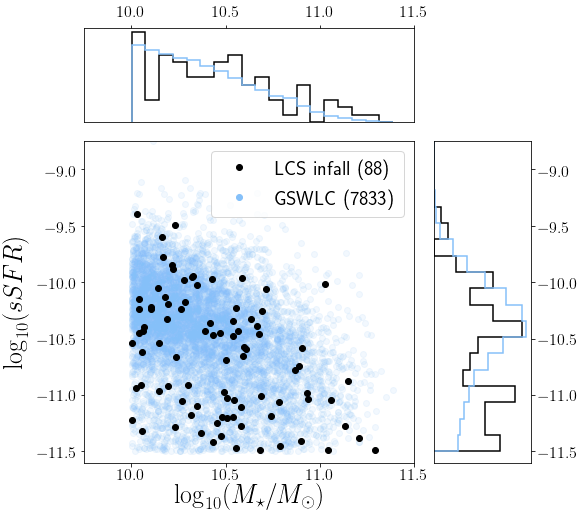

In [14]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py 
flag = ~b.lcs.cat['membflag'] & (b.lcs.cat['DELTA_V'] < 3.)
outfile1 = homedir+'/research/LCS/plots/lcscore-gsw-ssfrmstar.pdf'
outfile2 = homedir+'/research/LCS/plots/lcscore-gsw-ssfrmstar.png'
b.plot_ssfr_mstar(lcsflag=flag,label='LCS infall',outfile1=outfile1,outfile2=outfile2)

### sSFR-M*: LCS Core vs infall, no BT cut ###

* sSFRs are not significantly different
* stellar masses are the same

number in core sample =  92
number in external sample =  88
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.10
p-vale = 7.417e-01 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.16
p-vale = 1.612e-01 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

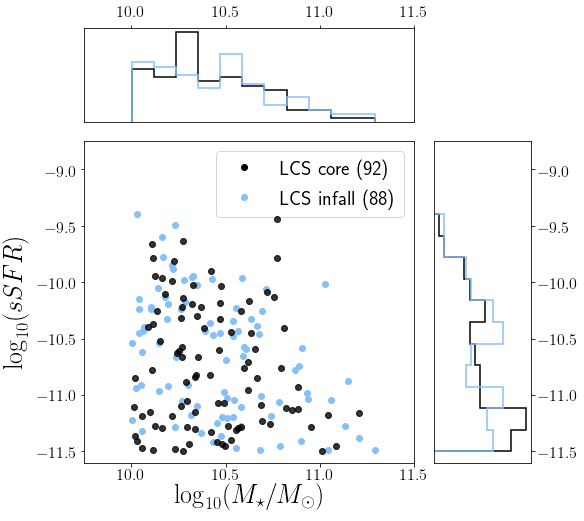

In [15]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py 
outfile1 = homedir+'/research/LCS/plots/lcscore-external-ssfrmstar.pdf'
outfile2 = homedir+'/research/LCS/plots/lcscore-external-ssfrmstar.png'
b.plot_ssfr_mstar_lcs(outfile1=outfile1,outfile2=outfile2,nbins=12)

# With B/T Cut #

### sSFR-M*: core vs GSWLC, with BT cut ###

* sSFRs are different
* mstar is the same

number in core sample =  38
number in external sample =  4791
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.11
p-vale = 7.201e-01 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.31
p-vale = 9.731e-04 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

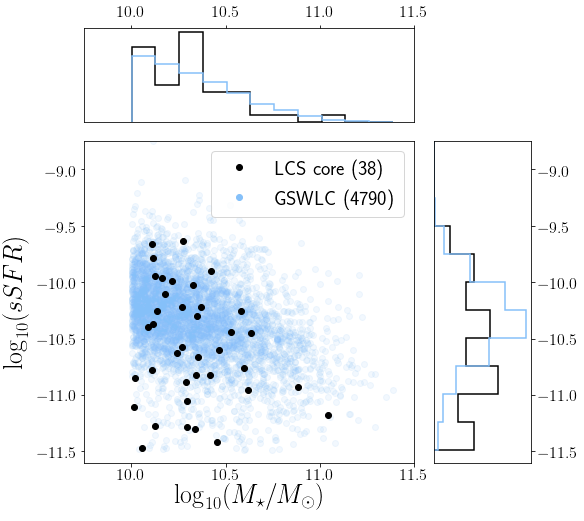

In [16]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT
flag = b.lcs.cat['membflag'] 
outfile1 = homedir+'/research/LCS/plots/lcscore-gsw-ssfrmstar-BTcut.pdf'
outfile2 = homedir+'/research/LCS/plots/lcscore-gsw-ssfrmstar-BTcut.png'
b.plot_ssfr_mstar(lcsflag=flag,outfile1=outfile1,outfile2=outfile2,nbins=12)

### sSFR-M*: infall vs GSWLC with B/T cut ###

* sSFRs are indistinguishable
* stellar masses are slightly different same


**do we need to make a mass-matched sample?**

number in core sample =  39
number in external sample =  4791
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.07
p-vale = 9.830e-01 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.09
p-vale = 8.442e-01 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

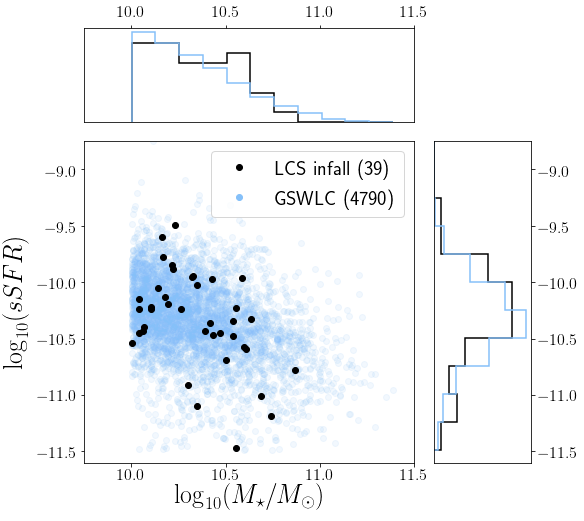

In [17]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT
flag = ~b.lcs.cat['membflag'] & (b.lcs.cat['DELTA_V'] < 3.)
outfile1 = homedir+'/research/LCS/plots/lcsinfall-gsw-ssfrmstar-BTcut.pdf'
outfile2 = homedir+'/research/LCS/plots/lcsinfall-gsw-ssfrmstar-BTcut.png'
b.plot_ssfr_mstar(lcsflag=flag,label='LCS infall',outfile1=outfile1,outfile2=outfile2,nbins=12)

### sSR-M*: LCS core vs infall with B/T cut###

* sSFRs are not different
* stellar masses are slightly different

number in core sample =  38
number in external sample =  39
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.15
p-vale = 6.981e-01 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.32
p-vale = 3.182e-02 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

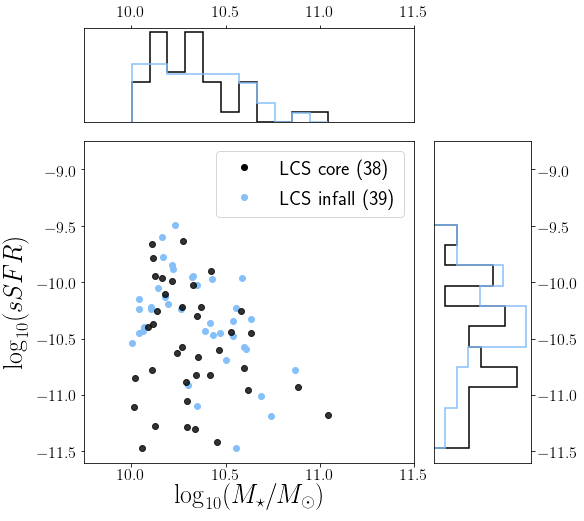

In [18]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT
outfile1 = homedir+'/research/LCS/plots/lcscore-external-ssfrmstar-BTcut.pdf'
outfile2 = homedir+'/research/LCS/plots/lcscore-external-ssfrmstar-BTcut.png'
b.plot_ssfr_mstar_lcs(outfile1=outfile1,outfile2=outfile2,nbins=12)

# Does sSFR correlate with size ratio #

* correlation is not super convincing, even if spearman rank says its 2.5 sigma

SpearmanrResult(correlation=0.18338266179153925, pvalue=0.010483468129402906)


<Figure size 489.6x360 with 0 Axes>

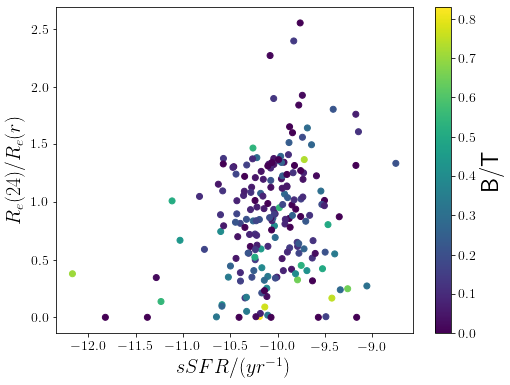

In [61]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py 
outfile1 = homedir+'/research/LCS/plots/lcs-ssfr-size.pdf'
outfile2 = homedir+'/research/LCS/plots/lcs-ssfr-size.png'
lcs.plot_ssfr_sizeratio(outfile1=outfile1,outfile2=outfile2)

SpearmanrResult(correlation=0.199655826934835, pvalue=0.012749020503582268)


<Figure size 489.6x360 with 0 Axes>

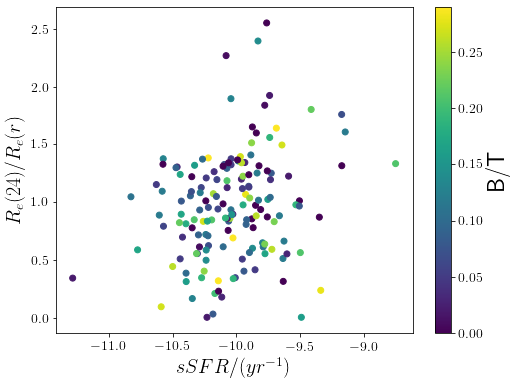

In [62]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT
outfile1 = homedir+'/research/LCS/plots/lcs-ssfr-size.pdf'
outfile2 = homedir+'/research/LCS/plots/lcs-ssfr-size.png'
lcs.plot_ssfr_sizeratio(outfile1=outfile1,outfile2=outfile2)